# Fitting

There are two built in fitting engines, `lmfit` and `bumps`.

Import all the packages.

In [5]:
# Import all the packages
from easyCore import np
from easyDiffractionLib.sample import Sample
from easyDiffractionLib import Phases
from easyDiffractionLib.interface import InterfaceFactory
from easyDiffractionLib.Elements.Experiments.Experiment import Pars1D
from easyDiffractionLib.Elements.Experiments.Pattern import Pattern1D

from easyCore.Fitting.Fitting import Fitter

import matplotlib.pyplot as plt

## Preparing the sample and data

We load up a cif file and then set the experimental parameters.

In [6]:
interface = InterfaceFactory()
c = Phases.from_cif_file('PbSO4.cif')
S = Sample(phases=c, parameters=Pars1D.default(), pattern=Pattern1D.default(), interface=interface)

Temp CIF: /tmp/easydiffraction_temp.cif


We can load up some experimental data

In [7]:
file_path = 'PbSO4_neutrons_short.xye'
data_x, data_y, data_e = np.loadtxt(file_path, unpack=True)

# Generate the simulation y-data
sim_y_data = interface.fit_func(data_x)


y_calc: [0.000e+00 0.000e+00 0.000e+00 ... 1.785e-27 5.036e-27 4.583e-27]


<IPython.core.display.Javascript object>


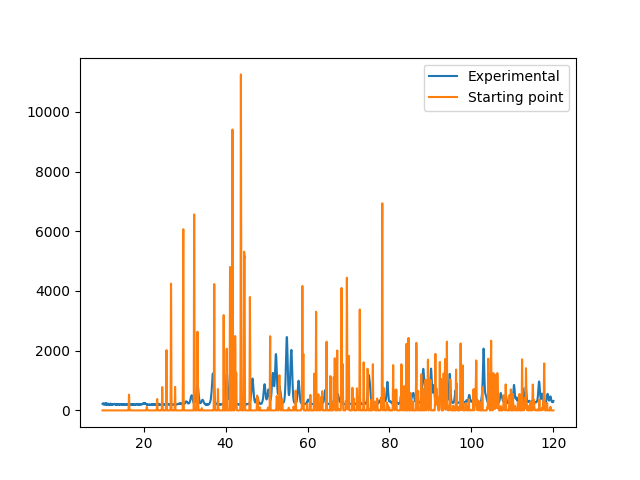

In [9]:
%matplotlib notebook
plt.plot(data_x, data_y, label='Experimental')
plt.plot(data_x, sim_y_data, label='Starting point')
plt.legend()

We do not have the correct experimental parameters..

y_calc: [0.000e+00 0.000e+00 0.000e+00 ... 3.176e-31 0.000e+00 0.000e+00]


<IPython.core.display.Javascript object>


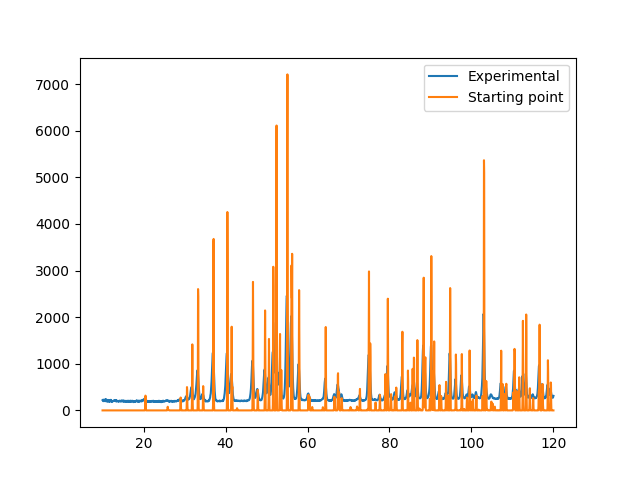

In [14]:
S.parameters.wavelength = 1.912
S.parameters.u_resolution = 1.4
S.parameters.v_resolution = -0.42
S.parameters.w_resolution = 0.38
S.parameters.x_resolution = 0.0
S.parameters.y_resolution = 0.0

sim_y_data = interface.fit_func(data_x)

%matplotlib notebook
plt.plot(data_x, data_y, label='Experimental')
plt.plot(data_x, sim_y_data, label='Starting point')
plt.legend()

Now we need to set the background

In [16]:
from easyDiffractionLib.Elements.Backgrounds.Point import PointBackground, BackgroundPoint

bg = PointBackground(linked_experiment='PbSO4')
bg.append(BackgroundPoint.from_pars(data_x[0], 200))
bg.append(BackgroundPoint.from_pars(data_x[-1], 200))

S.set_background(bg)

Collection of 1 backgrounds.
y_calc: [200. 200. 200. ... 200. 200. 200.]


<IPython.core.display.Javascript object>


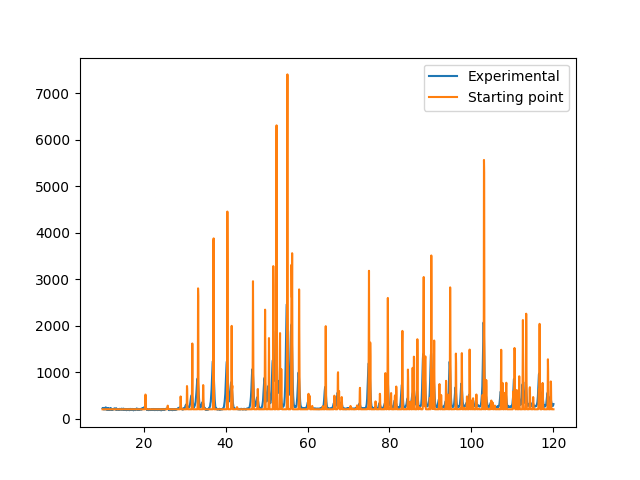

In [19]:
print(S.backgrounds)

sim_y_data = interface.fit_func(data_x)

%matplotlib notebook
plt.plot(data_x, data_y, label='Experimental')
plt.plot(data_x, sim_y_data, label='Starting point')
plt.legend()

## Fitting to the data

Initalize the fitting engine and apply a few constraints

In [20]:
f = Fitter(S, interface.fit_func)

# Vary the scale and the BG points
S.pattern.scale.fixed = False
S.backgrounds[0][0].y.fixed = False
S.backgrounds[0][1].y.fixed = False

Perform the fit

In [33]:
result = f.fit(data_x, data_y, weights=1/data_e)

if result.success:
    print("The fit has been successful: {}".format(result.success))
    print("The gooodness of fit is: {}".format(result.goodness_of_fit))
    
sim_y_data = interface.fit_func(data_x)

y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]
The fit has been successful: True
The gooodness of fit is: 1081064.8704245668
y_calc: [226.18  226.23  226.28  ... 336.443 336.493 336.543]


<IPython.core.display.Javascript object>


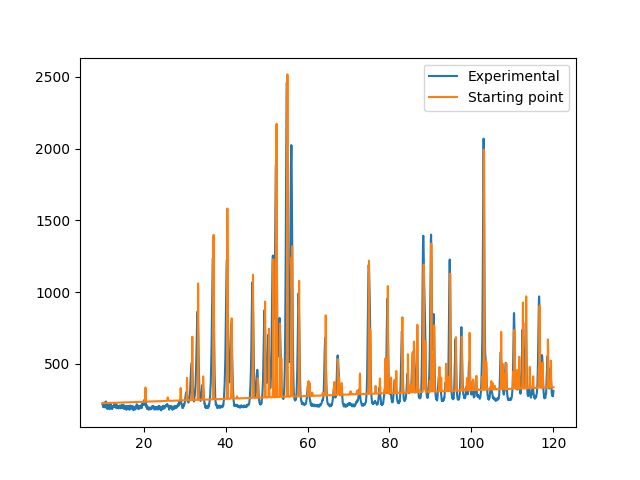

In [34]:
%matplotlib notebook
plt.plot(data_x, data_y, label='Experimental')
plt.plot(data_x, sim_y_data, label='Starting point')
plt.legend()

In [28]:
print(f'Scale: {S.pattern.scale}')
print(f'Scale: {S.backgrounds[0][0].y}')
print(f'Scale: {S.backgrounds[0][1].y}')

Scale: <Parameter 'scale': 0.3116+/-0.0107, bounds=[-inf:inf]>
Scale: <Parameter 'intensity': 226.1800+/-7.2321, bounds=[-inf:inf]>
Scale: <Parameter 'intensity': 336.5433+/-6.2611, bounds=[-inf:inf]>
